In [12]:
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
with open(r'D:\VKR_data\aij-wikiner-ru-wp3\aij-wikiner-ru-wp3', 'r', encoding='utf-8') as f:
    text_all = f.readlines()

In [3]:
text = []
for line in text_all:
    if line=='\n':
        continue
    else:
        text.append(line.strip('\n '))

In [4]:
len(text)

203287

In [5]:
data = []
for i, sen in tqdm(enumerate(text)):
    tokens = sen.split(' ')
    for t in tokens:
        t_split = t.split('|')
        data.append([i, t_split[0], t_split[2]])
df = pd.DataFrame(data, columns=['sentence', 'token', 'tag'])

0it [00:00, ?it/s]

In [6]:
text[10000]

'Далее|ADV|O граница|S|O меняет|V|O направление|S|O ,|PUNCT|O проходя|V|O по|PR|O улице|S|I-LOC Достоевского|S|I-LOC .|SENT|O'

In [7]:
df['tag'].unique()

array(['O', 'I-LOC', 'B-LOC', 'I-PER', 'I-MISC', 'I-ORG', 'B-PER',
       'B-MISC', 'B-ORG'], dtype=object)

In [8]:
n_tokens = lambda t: len(t.split(' '))

In [9]:
sent_len = list(map(n_tokens, text))

In [13]:
np.sort(sent_len)[:]

array([  1,   1,   1, ..., 191, 193, 219])

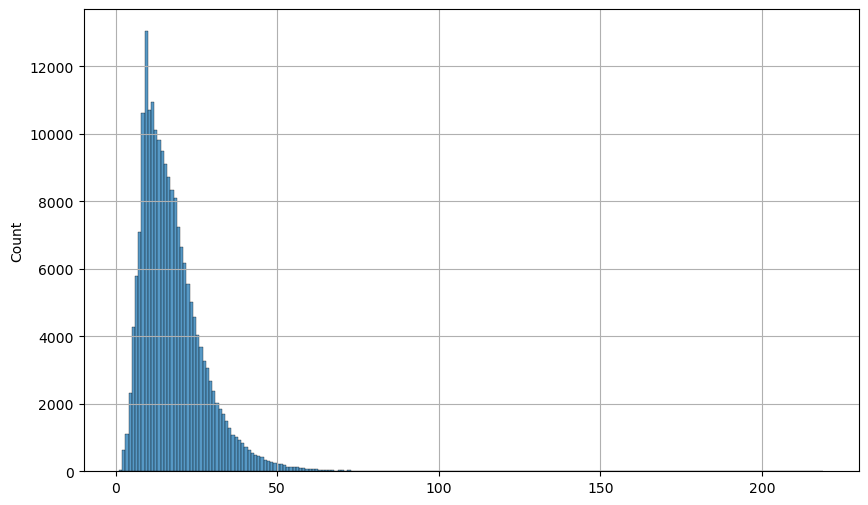

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(sent_len, bins=219)
plt.grid()

In [15]:
tags = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG',
        'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
print(f'total\t{len(df)}')
for tag_type in tags:
    print(f'{tag_type}\t{len(df[df.tag == tag_type])}')

total	3499392
O	2956710
B-PER	161
I-PER	136345
B-ORG	51
I-ORG	63666
B-LOC	1457
I-LOC	191820
B-MISC	348
I-MISC	148834


In [16]:
change_b = {
    'I-PER': 'B-PER',
    'I-ORG': 'B-ORG',
    'I-LOC': 'B-LOC',
    'I-MISC': 'B-MISC'
}

In [17]:
df[df['sentence']==500]

,sentence,token,tag
9528,500,8,O
9529,500,апреля,O
9530,500,1986,O
9531,500,года,O
9532,500,состоялся,O
9533,500,визит,O
9534,500,М.,I-PER
9535,500,С.,I-PER
9536,500,Горбачёва,I-PER
9537,500,в,O


In [18]:
i_tags = list(change_b.keys())
tag_prev = 'O'
for i in tqdm(range(len(df))):
    tag = df.iloc[i]['tag']
    if tag in i_tags and tag_prev not in [tag, change_b[tag]]:
        df.at[i, 'tag'] = change_b[tag]
    tag_prev = tag

  0%|          | 0/3499392 [00:00<?, ?it/s]

In [19]:
df[df['sentence'] == 500]

,sentence,token,tag
9528,500,8,O
9529,500,апреля,O
9530,500,1986,O
9531,500,года,O
9532,500,состоялся,O
9533,500,визит,O
9534,500,М.,B-PER
9535,500,С.,I-PER
9536,500,Горбачёва,I-PER
9537,500,в,O


In [20]:
df.sentence.max()

203286

In [21]:
print(f'total\t{len(df)}')
for tag_type in tags:
    print(f'{tag_type}\t{len(df[df.tag == tag_type])}')

total	3499392
O	2956710
B-PER	71626
I-PER	64880
B-ORG	37119
I-ORG	26598
B-LOC	144379
I-LOC	48898
B-MISC	79675
I-MISC	69507


In [22]:
len(np.where(np.array(sent_len) > 100)[0]) / len(sent_len)

0.00013281715013749036

In [23]:
df.to_csv('data/wikiner/wikiner_words_all.csv', index=False)

In [24]:
len(np.where((np.array(sent_len) > 100) | (np.array(sent_len) == 1))[0]) / len(sent_len)

0.00038369398928608323

In [25]:
data_100 = []
i = 0
for sen in tqdm(text):
    tokens = sen.split(' ')
    if len(tokens) > 100 or len(tokens) == 1:
            continue
    for t in tokens:
        t_split = t.split('|')
        data_100.append([i, t_split[0], t_split[2]])
    i += 1
df_100 = pd.DataFrame(data_100, columns=['sentence', 'token', 'tag'])

  0%|          | 0/203287 [00:00<?, ?it/s]

In [26]:
i_tags = list(change_b.keys())
tag_prev = 'O'
for i in tqdm(range(len(df_100))):
    tag = df_100.iloc[i]['tag']
    if tag in i_tags and tag_prev not in [tag, change_b[tag]]:
        df_100.at[i, 'tag'] = change_b[tag]
    tag_prev = tag

  0%|          | 0/3495748 [00:00<?, ?it/s]

In [27]:
print(f'total\t{len(df_100)}')
for tag_type in tags:
    print(f'{tag_type}\t{len(df_100[df_100.tag == tag_type])}')

total	3495748
O	2953893
B-PER	71526
I-PER	64755
B-ORG	37105
I-ORG	26592
B-LOC	143902
I-LOC	48822
B-MISC	79653
I-MISC	69500


In [28]:
df_100

,sentence,token,tag
0,0,На,O
1,0,севере,O
2,0,граничит,O
3,0,с,O
4,0,Латвией,B-LOC
...,...,...,...
3495743,203208,и,O
3495744,203208,по,O
3495745,203208,экстремальному,O
3495746,203208,дизайну,O


In [29]:
df_100.to_csv('data/wikiner/wikiner_words_100.csv', index=False)

In [56]:
df_nomisc = df_100.copy().replace({'B-MISC': 'O', 'I-MISC': 'O'})

In [57]:
df_nomisc

,sentence,token,tag,tag_n
0,0,На,O,1.0
1,0,севере,O,1.0
2,0,граничит,O,1.0
3,0,с,O,1.0
4,0,Латвией,B-LOC,6.0
...,...,...,...,...
3495743,203208,и,O,1.0
3495744,203208,по,O,1.0
3495745,203208,экстремальному,O,1.0
3495746,203208,дизайну,O,1.0


In [58]:
df_nomisc.tag.unique()

array(['O', 'B-LOC', 'I-LOC', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG'],
      dtype=object)

In [59]:
print(f'total\t{len(df_nomisc)}')
for tag_type in tags:
    print(f'{tag_type}\t{len(df_nomisc[df_nomisc.tag == tag_type])}')

total	3495748
O	3103046
B-PER	71526
I-PER	64755
B-ORG	37105
I-ORG	26592
B-LOC	143902
I-LOC	48822
B-MISC	0
I-MISC	0


In [60]:
tags_dict = {
    'O': 1,
    'B-PER': 2,
    'I-PER': 3,
    'B-ORG': 4,
    'I-ORG': 5,
    'B-LOC': 6,
    'I-LOC': 7
}

In [61]:
df_nomisc['tag_n']= df_nomisc.tag.map(tags_dict).astype(np.uint8)

In [62]:
df_nomisc

,sentence,token,tag,tag_n
0,0,На,O,1
1,0,севере,O,1
2,0,граничит,O,1
3,0,с,O,1
4,0,Латвией,B-LOC,6
...,...,...,...,...
3495743,203208,и,O,1
3495744,203208,по,O,1
3495745,203208,экстремальному,O,1
3495746,203208,дизайну,O,1


In [63]:
df_nomisc.to_csv('data/wikiner/wikiner_words_nomisc_100.csv', index=False)

In [70]:
sent_len_100 = [x for x in sent_len if not (x == 1 or x > 100)]

In [115]:
x_out = []
y_out = []

prev_index = 0
for i in tqdm(range(len(sent_len_100))):
    l = prev_index + sent_len_100[i]
    df_temp = df_nomisc.iloc[prev_index:l]
    
    x_out.append(df_temp.token.to_numpy())
    y_out.append(df_temp.tag_n.to_numpy())
    
    prev_index += sent_len_100[i]

  0%|          | 0/203209 [00:00<?, ?it/s]

In [106]:
df_temp

,sentence,token,tag,tag_n
3495721,203208,В,O,1
3495722,203208,результате,O,1
3495723,203208,его,O,1
3495724,203208,работы,O,1
3495725,203208,под,O,1
3495726,203208,маркой,O,1
3495727,203208,Stone,B-ORG,4
3495728,203208,Island,I-ORG,5
3495729,203208,стали,O,1
3495730,203208,появляться,O,1


In [80]:
# x_out = []
# y_out = []

# for i in tqdm(range(df_nomisc.sentence.max())):
#     df_temp = df_nomisc[df_nomisc.sentence==i]
#     x_out.append([df_temp.token.to_numpy()])
#     y_out.append([df_temp.tag_n.to_numpy()])

In [116]:
x_out[-1]

array(['В', 'результате', 'его', 'работы', 'под', 'маркой', 'Stone',
       'Island', 'стали', 'появляться', 'уникальные', 'вещи', 'как', 'по',
       'качеству', 'материала', 'и', 'технологиям', 'его', 'обработки',
       ',', 'так', 'и', 'по', 'экстремальному', 'дизайну', '.'],
      dtype=object)

In [117]:
y_out[-1]

array([1, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

In [118]:
with open(r'C:\Users\Egor\Desktop\python\VKR\data\wikiner\wikiner_x_100.pickle', 'wb') as f:
    pickle.dump(x_out, f)

with open(r'C:\Users\Egor\Desktop\python\VKR\data\wikiner\wikiner_y_100.pickle', 'wb') as f:
    pickle.dump(y_out, f)

# with open(r'C:\Users\Egor\Desktop\python\VKR\data\wikiner\wikiner_x_100.pickle', 'rb') as f:
#     x_out = pickle.load(f)
    
# with open(r'C:\Users\Egor\Desktop\python\VKR\data\wikiner\wikiner_y_100.pickle', 'rb') as f:
#     y_out = pickle.load(f)